In [1]:
import pandas as pd
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import math
from tqdm import tqdm

From project package

In [2]:
import  ProjectPackage.DataExtraction as de
import ProjectPackage.Kinematic as km
from ProjectPackage import Cut

**Importing data**

In [3]:
!curl "https://cernbox.cern.ch/index.php/s/r7VFXonK39smzKP/download?path=290223/AnalysisResults.root" > run290223.data.root
file = uproot.open("run290223.data.root")
events = file["eventsTree"]

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:06 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:06 --:--:--     0
  5 3602k    5  211k    0     0  27787      0  0:02:12  0:00:07  0:02:05 27792
 78 3602k   78 2827k    0     0   320k      0  0:00:11  0:00:08  0:00:03  320k
100 3602k  100 3602k    0     0   399k      0  0:00:09  0:00:09 --:--:--  597k


In [4]:
type(events)

uproot.models.TTree.Model_TTree_v20

In [6]:
type(events.arrays())

awkward.highlevel.Array

In [7]:
type(events.arrays()[0])

awkward.highlevel.Record

In [19]:
A = events.arrays()


In [17]:
dir(A)

['Mask',
 'Muon_Charge',
 'Muon_E',
 'Muon_MCHClusterMap',
 'Muon_MTRHitMapTrg',
 'Muon_MTRHitMapTrk',
 'Muon_Px',
 'Muon_Py',
 'Muon_Pz',
 'Muon_matchedTrgThreshold',
 'Muon_thetaAbs',
 'Muon_xDCA',
 'Muon_yDCA',
 'Muon_zDCA',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__self_class__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__thisclass__',
 '_behavior',
 '_caches',
 '_layout',
 '_numbaview',
 'behavior',
 'caches',
 'fields',
 'isCINT',
 'isCMLL',
 'isCMSH',
 'isCMSL',
 'isCMUL',
 'layout',
 'mask',
 'nMuons',
 'nbytes',
 'ndim',
 'numba_type',
 'runNumber',
 'slot0',
 'slot1',
 'slot2',
 'slot3',
 'slot4',
 'slot5',
 'slot6',
 'slot7',
 'slot8',
 'slot9',
 'to_list',
 'to_numpy',
 'tolist',
 'type',
 'xVtx',
 'yVtx'

In [25]:
attributes = []

ValueError: key "Muon" does not exist (not in record)

(https://github.com/scikit-hep/awkward-1.0/blob/1.7.0/src/libawkward/util.cpp#L525)

In [32]:
A = events.arrays(['E', 'Px', 'Py',
'Pz',
'Charge',
'thetaAbs',
'xDCA',
'yDCA',
'zDCA'])

KeyInFileError: not found: 'E'
in file run290223.data.root
in object /eventsTree;1

In [13]:
dir(R)

['Muon_Charge',
 'Muon_E',
 'Muon_MCHClusterMap',
 'Muon_MTRHitMapTrg',
 'Muon_MTRHitMapTrk',
 'Muon_Px',
 'Muon_Py',
 'Muon_Pz',
 'Muon_matchedTrgThreshold',
 'Muon_thetaAbs',
 'Muon_xDCA',
 'Muon_yDCA',
 'Muon_zDCA',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__self_class__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__thisclass__',
 '_behavior',
 '_caches',
 '_layout',
 '_numbaview',
 'behavior',
 'caches',
 'fields',
 'isCINT',
 'isCMLL',
 'isCMSH',
 'isCMSL',
 'isCMUL',
 'layout',
 'nMuons',
 'nbytes',
 'numba_type',
 'runNumber',
 'slot0',
 'slot1',
 'slot2',
 'slot3',
 'slot4',
 'slot5',
 'slot6',
 'slot7',
 'slot8',
 'slot9',
 'to_list',
 'tolist',
 'type',
 'xVtx',
 'yVtx',
 'zVtx']

In [3]:
# events.keys()

We select the event with at least one trace

In [26]:
data_folder = 'D:/Data_muons/dimuonData_LHC18m'
ev = de.read_root_file(data_folder, run=291944)
print(ev.runNumber[0])

Size of the data file : 139705170.
Extraction took 45.6 s.
Number of events : 1638174.
291944


Numer of events in the file

In [4]:
print(f'{len(ev)} events.')

1638174 events.


In [27]:
m = ev[ev.nMuons > 0]

In [28]:
print(f'{len(m)} events remaining')

933871 events remaining


In [35]:
df = ak.to_pandas(m["Muon"])[['E', 'Px', 'Py',
'Pz',
'Charge',
'thetaAbs',
'xDCA',
'yDCA',
'zDCA']]

In [ ]:
# df.to_csv(data_folder + '/' + '290222/' + 'datamuons.csv', index=False)

In [36]:
list(df.columns)

['E', 'Px', 'Py', 'Pz', 'Charge', 'thetaAbs', 'xDCA', 'yDCA', 'zDCA']

In [37]:
df.head()

,,E,Px,Py,Pz,Charge,thetaAbs,xDCA,yDCA,zDCA
entry,subentry,,,,,,,,,
0,0,6.826864,0.026254,-0.309170,-6.818990,-1,2.438762,-7.079330,-5.094169,-4.122684
1,0,13.226941,-0.690834,0.192199,-13.207067,1,3.106542,0.468913,-4.600604,-3.369117
2,0,11.157099,0.092060,0.464209,-11.146557,1,2.511646,-5.803252,-7.654648,-1.972499
3,0,13.713444,0.356284,0.316609,-13.704751,-1,2.206913,-13.985678,-19.539028,0.834984
4,0,9.084538,-0.560383,-0.265464,-9.062735,-1,3.831758,-0.382902,-2.337380,-4.201404


In [47]:
m[0]

<Record ... MTRHitMapTrk: 4794367}]} type='{"runNumber": int32, "xVtx": float64,...'>

In [49]:
DCA = np.sqrt(df.xDCA.to_numpy()**2 + df.yDCA.to_numpy()**2 + df.zDCA.to_numpy()**2)

(array([3.0798e+04, 1.3170e+03, 3.3200e+02, 1.8100e+02, 1.0200e+02,
        4.2000e+01, 1.8000e+01, 8.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([2.01149712e-01, 4.66101699e+01, 9.30191901e+01, 1.39428210e+02,
        1.85837231e+02, 2.32246251e+02, 2.78655271e+02, 3.25064291e+02,
        3.71473311e+02, 4.17882332e+02, 4.64291352e+02]),
 <BarContainer object of 10 artists>)

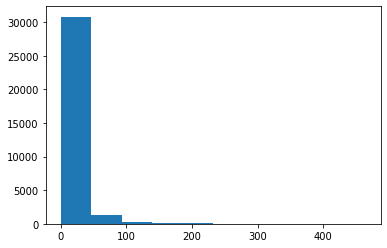

In [50]:
plt.hist(DCA)

(array([1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 3.000e+00, 3.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 1.000e+01, 2.200e+01, 1.000e+02,
        3.000e+02, 6.310e+02, 1.283e+03, 2.009e+03, 2.927e+03, 3.625e+03,
        4.114e+03, 4.449e+03, 3.926e+03, 3.359e+03, 2.460e+03, 1.752e+03,
        1.086e+03, 4.770e+02, 1.760e+02, 3.700e+01, 1.100e+01, 3.000e+00,
        1.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 4.000e+00, 1.000e+00,
        2.000e+00, 3.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 3.000e+00,
        1.000e+00, 1.000e+00]),
 array([-39.80208206, -38.2294458 , -36.65680954, -35.08417328,
        -33.51153702, -31.93890076, -30.3662645 , -28.79362823,
        -27.22099197, -25.64835571, -24.07571945, -22.50308319,
        -20.93044693, -19.35781067, -17.78517441, -16.21253815,
        -14.63990189, -13.06726563, -11.49462936,  -9.9219931 ,
         -8.34935684,  -6.77672058,  -5.20408432,  -3.63

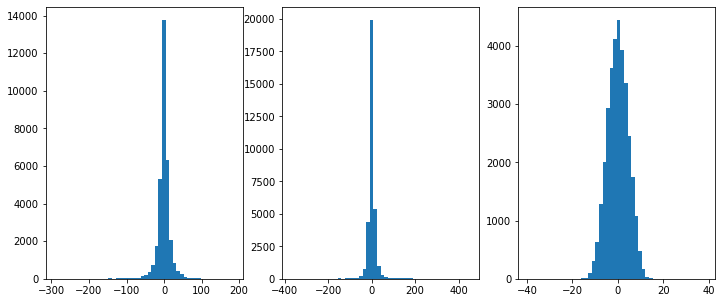

In [55]:
fig, ax = plt.subplots(1,3, figsize=(12,5))
bins = 50

ax[0].hist(df.xDCA.to_numpy(), bins=bins)
ax[1].hist(df.yDCA.to_numpy(), bins=bins)
ax[2].hist(df.zDCA.to_numpy(), bins=bins)

In [10]:
df_DCA = pd.DataFrame()
corr = df.thetaAbs.apply(lambda x:-3 if x < 3 else -2.4)
df_DCA["PxDCAx"] = (corr + df.Px) * df.xDCA
df_DCA["PxDCAy"] = (corr + df.Py) * df.yDCA
df_DCA["PxDCAz"] = (corr + df.Pz) * df.zDCA

In [15]:
df_DCA['sig_DCA_x'] = df.apply(lambda x: Cut.sigma_pxDCA(x["Px"], x['thetaAbs']), axis=1)
df_DCA['sig_DCA_y'] = df.apply(lambda x: Cut.sigma_pxDCA(x["Py"], x['thetaAbs']), axis=1)
df_DCA['sig_DCA_z'] = df.apply(lambda x: Cut.sigma_pxDCA(x["Pz"], x['thetaAbs']), axis=1)

In [16]:
df_DCA.head()

,,PxDCAx,PxDCAy,PxDCAz,sig_DCA_x,sig_DCA_y,sig_DCA_z
entry,subentry,,,,,,
0,0,-25.702594,22.570353,116.268214,1005.396973,502.555927,31992.044671
1,0,-109.312189,91.429702,38.455239,1148.198529,360.445074,14918.013660
2,0,-40.093159,-0.340045,-41.391726,1501.700275,398.185972,30634.557639
3,0,-17.880140,27.853995,-90.106001,1446.056997,329.892872,21327.359802
4,0,-25.053107,-6.354755,-11.139157,1994.331511,535.101084,20289.124237


In [3]:
data_folder = 'D:/Data_muons/dimuonData_LHC18m'
run_number =290222
ev = de.read_root_file(data_folder, run=run_number)
ev = Cut.z_cut(ev)

In [4]:
len(ev)

181430

In [5]:
ev_di_muons = ev[ev.isCMUL==True]
ev_di_muons = ev_di_muons[ev_di_muons.nMuons>1]

In [5]:
len(ev_di_muons)

282

In [15]:
ev_di_muons[0].to_list()

{'runNumber': 291944,
 'xVtx': 0.06278887391090393,
 'yVtx': 0.3863312304019928,
 'zVtx': -5.856949329376221,
 'isCINT': False,
 'isCMSL': False,
 'isCMSH': False,
 'isCMLL': False,
 'isCMUL': True,
 'nMuons': 2,
 'Muon': [{'E': 24.952720642089844,
   'Px': -1.3786358833312988,
   'Py': 1.0393643379211426,
   'Pz': -24.8926944732666,
   'Charge': -1,
   'thetaAbs': 3.9479880332946777,
   'xDCA': -0.09959172457456589,
   'yDCA': -0.38587722182273865,
   'zDCA': -5.856949329376221,
   'matchedTrgThreshold': 2,
   'MCHClusterMap': 1019,
   'MTRHitMapTrg': 1079301375,
   'MTRHitMapTrk': 5547007},
  {'E': 7.62927770614624,
   'Px': -0.3420533835887909,
   'Py': -0.24807170033454895,
   'Pz': -7.616835117340088,
   'Charge': 1,
   'thetaAbs': 3.401120901107788,
   'xDCA': 18.861175537109375,
   'yDCA': 8.311524391174316,
   'zDCA': -5.856949329376221,
   'matchedTrgThreshold': 2,
   'MCHClusterMap': 1005,
   'MTRHitMapTrg': 3227374847,
   'MTRHitMapTrk': 6136831}]}

In [6]:
df = ak.to_pandas(ev_di_muons["Muon"])

In [20]:
df.head()

E        Px        Py         Pz  Charge  thetaAbs  \
entry subentry                                                               
0     0         36.059113 -1.364485  0.620896 -36.027782       1  2.390592   
      1         17.401632 -0.519733 -0.622598 -17.382402      -1  2.571476   
1     0         76.853142  4.812110  8.579062 -76.220978       1  7.472237   
      1         11.631263 -0.482226 -0.510783 -11.609551      -1  3.390732   
      2          3.966810 -0.295937  0.148850  -3.951541       1  4.419906   

                     xDCA       yDCA      zDCA  matchedTrgThreshold  \
entry subentry                                                        
0     0          1.101865   1.569987 -1.970878                    2   
      1         -5.065172  -2.875883 -1.970878                    2   
1     0          1.473749  -0.109582  5.605232                    3   
      1         -3.289724  -2.426003  5.605232                    2   
      2        -38.165367  39.097424  5.605232                    0   

                MCHClusterMap  MTRHitMapTrg  MTRHitMapTrk  
entry subentry                                             
0     0                  1023    3226051583       4826111  
      1                  1021    1077794047       4041727  
1     0                   511    3223130111       1904639  
      1                  1021    1078275839       4534015  
      2                  1023    1073741824         23616

In [7]:
df.shape

(599, 13)

In [23]:
df["Rapidity"] = df.apply(lambda x: km.eta(x["Px"], x["Py"], x["Pz"]), axis=1)

In [13]:
df["P"] = df.apply(lambda x: Cut.p_fc(math.sqrt(x["Px"]**2 +  x["Py"]**2 + x["Pz"]**2), x['thetaAbs']) , axis=1)
df["DCA"] = df.apply(lambda x: math.sqrt(x["xDCA"]**2 +  x["yDCA"]**2 + x["zDCA"]**2), axis=1)

In [23]:
# df['radius'] = df.apply(lambda x: km.radial_coord(x["xDCA"], x["yDCA"], x["zDCA"]), axis=1)

AttributeError: module 'ProjectPackage.Kinematic' has no attribute 'radial_coord'

In [14]:
df['pxDCA'] = df.P * df.DCA

In [19]:
N_cut = 5
df['s_pxDCA'] = df.apply(lambda x : Cut.sigma_pxDCA(x['P'], x['thetaAbs'], N=N_cut), axis=1)

In [20]:
df

E        Px        Py         Pz  Charge  thetaAbs  \
entry subentry                                                               
0     0         36.059113 -1.364485  0.620896 -36.027782       1  2.390592   
      1         17.401632 -0.519733 -0.622598 -17.382402      -1  2.571476   
1     0         76.853142  4.812110  8.579062 -76.220978       1  7.472237   
      1         11.631263 -0.482226 -0.510783 -11.609551      -1  3.390732   
      2          3.966810 -0.295937  0.148850  -3.951541       1  4.419906   
...                   ...       ...       ...        ...     ...       ...   
279   1          8.574280  0.524311  1.226040  -8.469299      -1  8.935683   
280   0          7.209572 -0.397797  0.614670  -7.171521       1  6.041617   
      1         14.140283  1.442732 -1.356802 -14.000502      -1  8.044199   
281   0          8.807313 -0.425543  0.699045  -8.768572       1  5.368339   
      1         21.754391 -0.675162 -0.474340 -21.738480      -1  2.158971   

                     xDCA       yDCA      zDCA  matchedTrgThreshold  \
entry subentry                                                        
0     0          1.101865   1.569987 -1.970878                    2   
      1         -5.065172  -2.875883 -1.970878                    2   
1     0          1.473749  -0.109582  5.605232                    3   
      1         -3.289724  -2.426003  5.605232                    2   
      2        -38.165367  39.097424  5.605232                    0   
...                   ...        ...       ...                  ...   
279   1          1.689850   8.564774  2.823283                    2   
280   0         23.790482  19.908659 -0.022973                    2   
      1         -4.301436  -1.084870 -0.022973                    2   
281   0         -4.529107  -0.019625  5.321820                    2   
      1         -1.737888   2.355752  5.321820                    2   

                MCHClusterMap  MTRHitMapTrg  MTRHitMapTrk          P  \
entry subentry                                                         
0     0                  1023    3226051583       4826111  33.058958   
      1                  1021    1077794047       4041727  14.401312   
1     0                   511    3223130111       1904639  74.453069   
      1                  1021    1078275839       4534015   9.230784   
      2                  1023    1073741824         23616   1.565402   
...                       ...           ...           ...        ...   
279   1                  1023    1075579903       1838079   6.173629   
280   0                  1023    3228062975       6836735   4.808798   
      1                  1023    1076870911       3129087  11.739888   
281   0                  1023    3226278911       5053439   6.406679   
      1                   957    1078351103       4598783  18.754134   

                      DCA       pxDCA        s_pxDCA  
entry subentry                                        
0     0          2.750150   90.917100   42281.390364  
      1          6.149067   88.554636   19812.628932  
1     0          5.796772  431.587471  297637.081907  
      1          6.937319   64.036891   16745.113679  
      2         54.923787   85.977818    3702.023917  
...                   ...         ...            ...  
279   1          9.175068   56.643461   29513.641134  
280   0         31.021642  149.176812   15543.405805  
      1          4.436195   52.080432   50524.357479  
281   0          6.988202   44.771168   18400.458114  
      1          6.073845  113.909701   21662.114734  

[599 rows x 17 columns]

(array([19., 40., 50., 63., 57., 57., 54., 52., 42., 21., 21., 27., 16.,
        15., 10.,  7.,  3.,  5.,  5.,  5.,  1.,  2.,  2.,  1.,  4.,  2.,
         2.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  2.,  0.,  1.,  1.,  0.,
         0.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   7.25313456,   19.4134982 ,   31.57386184,   43.73422547,
          55.89458911,   68.05495275,   80.21531639,   92.37568003,
         104.53604367,  116.69640731,  128.85677095,  141.01713459,
         153.17749823,  165.33786187,  177.49822551,  189.65858914,
         201.81895278,  213.97931642,  226.13968006,  238.3000437 ,
         250.46040734,  262.62077098,  274.78113462,  286.94149826,
         299.1018619 ,  31

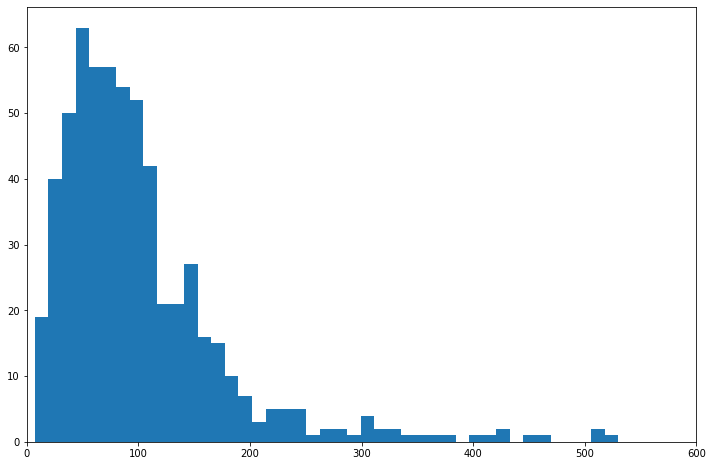

In [18]:
plt.figure(figsize=(12,8))
plt.xlim(0,600)
plt.hist(df.pxDCA, bins=100)

In [22]:
df["Rapidity y"] = df.apply(lambda x: km.y(x["Pz"], x["E"]), axis=1)

ValueError: math domain error

In [24]:
df = df[(df["Rapidity"] < -2.5) & (df["Rapidity"] > -4)]

In [25]:
df.shape

(560, 18)

In [26]:
df

E        Px        Py         Pz  Charge  thetaAbs  \
entry subentry                                                               
0     0         36.059113 -1.364485  0.620896 -36.027782       1  2.390592   
      1         17.401632 -0.519733 -0.622598 -17.382402      -1  2.571476   
1     0         76.853142  4.812110  8.579062 -76.220978       1  7.472237   
      1         11.631263 -0.482226 -0.510783 -11.609551      -1  3.390732   
      2          3.966810 -0.295937  0.148850  -3.951541       1  4.419906   
...                   ...       ...       ...        ...     ...       ...   
279   1          8.574280  0.524311  1.226040  -8.469299      -1  8.935683   
280   0          7.209572 -0.397797  0.614670  -7.171521       1  6.041617   
      1         14.140283  1.442732 -1.356802 -14.000502      -1  8.044199   
281   0          8.807313 -0.425543  0.699045  -8.768572       1  5.368339   
      1         21.754391 -0.675162 -0.474340 -21.738480      -1  2.158971   

                     xDCA       yDCA      zDCA  matchedTrgThreshold  \
entry subentry                                                        
0     0          1.101865   1.569987 -1.970878                    2   
      1         -5.065172  -2.875883 -1.970878                    2   
1     0          1.473749  -0.109582  5.605232                    3   
      1         -3.289724  -2.426003  5.605232                    2   
      2        -38.165367  39.097424  5.605232                    0   
...                   ...        ...       ...                  ...   
279   1          1.689850   8.564774  2.823283                    2   
280   0         23.790482  19.908659 -0.022973                    2   
      1         -4.301436  -1.084870 -0.022973                    2   
281   0         -4.529107  -0.019625  5.321820                    2   
      1         -1.737888   2.355752  5.321820                    2   

                MCHClusterMap  MTRHitMapTrg  MTRHitMapTrk          P  \
entry subentry                                                         
0     0                  1023    3226051583       4826111  33.058958   
      1                  1021    1077794047       4041727  14.401312   
1     0                   511    3223130111       1904639  74.453069   
      1                  1021    1078275839       4534015   9.230784   
      2                  1023    1073741824         23616   1.565402   
...                       ...           ...           ...        ...   
279   1                  1023    1075579903       1838079   6.173629   
280   0                  1023    3228062975       6836735   4.808798   
      1                  1023    1076870911       3129087  11.739888   
281   0                  1023    3226278911       5053439   6.406679   
      1                   957    1078351103       4598783  18.754134   

                      DCA       pxDCA        s_pxDCA  Rapidity  
entry subentry                                                  
0     0          2.750150   90.917100   42281.390364 -3.872999  
      1          6.149067   88.554636   19812.628932 -3.758614  
1     0          5.796772  431.587471  297637.081907 -2.744822  
      1          6.937319   64.036891   16745.113679 -3.499066  
      2         54.923787   85.977818    3702.023917 -3.173849  
...                   ...         ...            ...       ...  
279   1          9.175068   56.643461   29513.641134 -2.547969  
280   0         31.021642  149.176812   15543.405805 -2.977614  
      1          4.436195   52.080432   50524.357479 -2.653856  
281   0          6.988202   44.771168   18400.458114 -3.066916  
      1          6.073845  113.909701   21662.114734 -3.964803  

[560 rows x 18 columns]

In [28]:
df.index

MultiIndex([(  0, 0),
            (  0, 1),
            (  1, 0),
            (  1, 1),
            (  1, 2),
            (  2, 0),
            (  2, 1),
            (  3, 0),
            (  3, 1),
            (  4, 0),
            ...
            (276, 0),
            (276, 1),
            (277, 0),
            (277, 1),
            (279, 0),
            (279, 1),
            (280, 0),
            (280, 1),
            (281, 0),
            (281, 1)],
           names=['entry', 'subentry'], length=560)

In [31]:
ev_3_muons= ev_di_muons[ev_di_muons.nMuons==3]

In [42]:
ev_3_muons[1].to_list()

{'runNumber': 290222,
 'xVtx': 0.06518706679344177,
 'yVtx': 0.34590184688568115,
 'zVtx': 0.5089737772941589,
 'isCINT': False,
 'isCMSL': True,
 'isCMSH': True,
 'isCMLL': False,
 'isCMUL': True,
 'nMuons': 3,
 'Muon': [{'E': 14.64432430267334,
   'Px': 0.5663411021232605,
   'Py': 0.6168460249900818,
   'Pz': -14.619980812072754,
   'Charge': -1,
   'thetaAbs': 3.4720425605773926,
   'xDCA': 9.550883293151855,
   'yDCA': -26.73797607421875,
   'zDCA': 0.5089737772941589,
   'matchedTrgThreshold': 3,
   'MCHClusterMap': 927,
   'MTRHitMapTrg': 3221607679,
   'MTRHitMapTrk': 362239},
  {'E': 20.201513290405273,
   'Px': 0.6347718834877014,
   'Py': 1.0577472448349,
   'Pz': -20.163536071777344,
   'Charge': 1,
   'thetaAbs': 3.491227149963379,
   'xDCA': -5.3465094566345215,
   'yDCA': 6.0742926597595215,
   'zDCA': 0.5089737772941589,
   'matchedTrgThreshold': 0,
   'MCHClusterMap': 991,
   'MTRHitMapTrg': 1073741824,
   'MTRHitMapTrk': 22659},
  {'E': 16.556285858154297,
   'Px': 0.

In [8]:
ev_2_muons= ev_di_muons[ev_di_muons.nMuons==2]


In [46]:
len(ev_di_muons[ev_di_muons.nMuons==5])

0

In [9]:
df_2 = ak.to_pandas(ev_2_muons["Muon"])

In [49]:
df_2.Charge.sum()

-10

In [71]:
df_2.head()

E        Px        Py         Pz  Charge  thetaAbs  \
entry subentry                                                               
0     0         36.059113 -1.364485  0.620896 -36.027782       1  2.390592   
      1         17.401632 -0.519733 -0.622598 -17.382402      -1  2.571476   
1     0          7.452993 -0.343003  0.018630  -7.444323      -1  2.725166   
      1         15.109376  0.232350 -1.162825 -15.062401      -1  4.473138   
2     0         18.759314 -1.506759 -0.322272 -18.695627      -1  4.598283   

                     xDCA       yDCA      zDCA  matchedTrgThreshold  \
entry subentry                                                        
0     0          1.101865   1.569987 -1.970878                    2   
      1         -5.065172  -2.875883 -1.970878                    2   
1     0         21.123550  10.153259 -0.200272                    2   
      1          6.240619   1.296783 -0.200272                    2   
2     0         -3.430157   2.484380 -4.567211                    2   

                MCHClusterMap  MTRHitMapTrg  MTRHitMapTrk  
entry subentry                                             
0     0                  1023    3226051583       4826111  
      1                  1021    1077794047       4041727  
1     0                  1005    1079693823         25855  
      1                  1023    1073861887        114687  
2     0                   943    1079749631       6007807

In [10]:
index = []
for idx, data in df_2.groupby(level=0):
    if data["Charge"].sum() != 0:
        index.append(idx)

In [11]:
df_2.drop(index=index, inplace=True)

In [12]:
df_2.shape

(452, 13)

In [13]:
M_inv = []

for idx, data in tqdm(df_2.groupby(level=0)):
    E1, E2 = data['E']
    tab = data[['Px', 'Py', 'Pz']].to_numpy()
    P1, P2 = tab[0], tab[1]
    M_inv.append(km.inv_mass(E1, E2,  P1, P2))

M_inv = np.array(M_inv)

100%|██████████| 226/226 [00:02<00:00, 99.27it/s] 


In [40]:
'''for idx, data in df_2.groupby(level=0):
    print(data)
    E1, E2 = data['E']
    tab = data[['Px', 'Py', 'Pz']].to_numpy()
    P1, P2 = tab[0], tab[1]
    print(P1, P2)'''

                        E        Px        Py         Pz  Charge  thetaAbs  \
entry subentry                                                               
0     0         24.952721 -1.378636  1.039364 -24.892694      -1  3.947988   
      1          7.629278 -0.342053 -0.248072  -7.616835       1  3.401121   

                     xDCA      yDCA      zDCA  matchedTrgThreshold  \
entry subentry                                                       
0     0         -0.099592 -0.385877 -5.856949                    2   
      1         18.861176  8.311524 -5.856949                    2   

                MCHClusterMap  MTRHitMapTrg  MTRHitMapTrk  
entry subentry                                             
0     0                  1019    1079301375       5547007  
      1                  1005    3227374847       6136831  
                        E        Px        Py         Pz  Charge  thetaAbs  \
entry subentry                                                               
1     0   

KeyboardInterrupt: 

(array([ 9., 10., 14., 11.,  9.,  5., 11., 13.,  7., 10., 12., 10.,  5.,
        16., 11., 13.,  4., 10.,  4.,  3.,  5.,  3.,  3.,  0.,  3.,  0.,
         1.,  2.,  1.,  1.,  4.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  3.,
         1.,  1.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.]),
 array([0.04004443, 0.11822281, 0.19640119, 0.27457958, 0.35275796,
        0.43093634, 0.50911473, 0.58729311, 0.66547149, 0.74364988,
        0.82182826, 0.90000664, 0.97818503, 1.05636341, 1.13454179,
        1.21272018, 1.29089856, 1.36907694, 1.44725533, 1.52543371,
        1.60361209, 1.68179048, 1.75996886, 1.83814724, 1.91632563,
        1.99450401, 2.07268239, 2.15086078, 2.22903916, 2.30721754,
        2.38539593, 2.46357431, 2.54175269, 2.61993107, 2.69810946,
        2.77628784, 2.85446622, 2.93264461, 3.01082299, 3.08900137

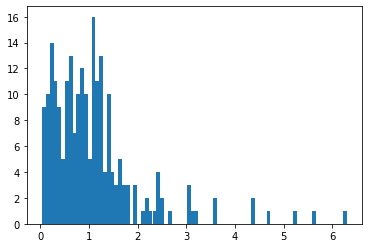

In [23]:
# plt.xlim(1.5, 5)
plt.hist(M_inv, bins=80)


Let's try with more stats


In [24]:
run_number =291944
ev = de.read_root_file(data_folder, run=run_number)
ev = Cut.z_cut(ev)

In [15]:
ev_di_muons = ev[ev.isCMUL==True]
ev_di_muons = ev_di_muons[ev_di_muons.nMuons>1]

In [16]:
ev_2_muons= ev_di_muons[ev_di_muons.nMuons==2]

In [17]:
df_2 = ak.to_pandas(ev_2_muons["Muon"])

In [18]:
index = []
for idx, data in tqdm(df_2.groupby(level=0)):
    if data["Charge"].sum() != 0:
        index.append(idx)

In [ ]:
df_2.drop(index=index, inplace=True)

In [28]:
df_2.shape

(153846, 13)

In [19]:
M_inv = []
# Compute the invariant mass for each pair of muons
# Long to execute, could be optimize by applying function to the dataframe maybe
for idx, data in tqdm(df_2.groupby(level=0)):
    E1, E2 = data['E']
    tab = data[['Px', 'Py', 'Pz']].to_numpy()
    P1, P2 = tab[0], tab[1]
    M_inv.append(km.inv_mass(E1, E2,  P1, P2))

100%|██████████| 76923/76923 [06:28<00:00, 197.79it/s]


In [160]:
np.savetxt('M_inv', M_inv)

In [ ]:
df_2.groupby(level=0).agg(lambda x:km.inv_mass(E1, E2,  P1, P2))

In [20]:
M_inv = np.array(M_inv)

In [155]:
n_bins = round((M_inv.max() - M_inv.min()) * 0.1) + 1
bins = np.linspace(1.5, 5, 36)
bins

array([1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])

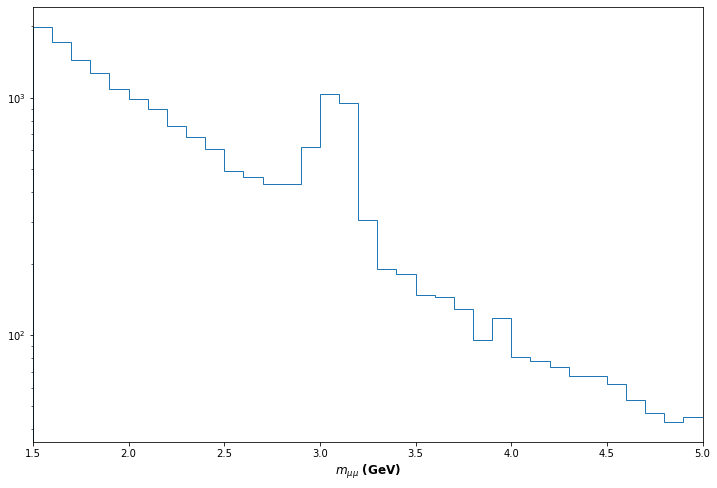

In [156]:
plt.figure(figsize=(12,8))
plt.xlim(1.5,5)
plt.semilogy()
plt.xlabel("$m_{\mu\mu}$ (GeV)", fontweight='bold', fontsize=12)
h = plt.hist(M_inv, bins=bins, range=[1.5,5], histtype='step', align='mid')

In [137]:
M_inv.max() - M_inv.min()


301.5182108630896

In [157]:
h[1][1] - h[1][0]

0.10000000000000009

**Fitting the J/Psi excess**

In [77]:
from scipy.optimize import curve_fit
from scipy.stats import crystalball
from scipy.interpolate import interp1d

In [64]:
from itertools import pairwise
x_c = np.array([(x1 + x2)/2 for x1, x2 in pairwise(h[1])])

(100,)

Fitting the background :

We first have to select the data corresponding to the range of transverse mass

In [72]:
# x, y = h[1][0:-2], h[0]
x, y = np.array([(x1 + x2)/2 for x1, x2 in pairwise(h[1])]), h[0]

m_min, m_max = 2.7, 3.4 # range of the mass excess

i_min = np.where(x > m_min)[0][0]
i_max = np.where(x < m_max)[0][-1]

x_JP, y_JP = x[i_min:i_max+1], y[i_min:i_max+1]

In [73]:
x1, x2 = x_JP[0], x_JP[-1]
y0, y1 = y_JP[0], y_JP[-1]

# back_ground = interp1d()

In [79]:
def double_exp(t, A, B, k1,k2):
    return A * np.exp(-k1 * t) + B * np.exp(-k2 * t)

In [74]:
idx = [i for i in range(i_min)] + [i for i in range(i_max, len(x))]
x_without_JP = x[idx]
y_without_JP = y[idx]


In [ ]:
a, b, t1, t2 = curve_fit(double_exp, x_without_JP, y_without_JP)[0]

[]

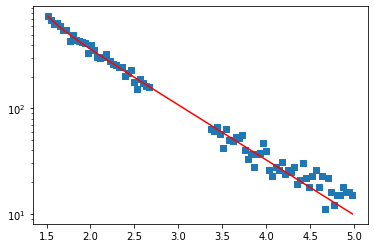

In [128]:
plt.scatter(x_without_JP, y_without_JP, marker='s')
plt.plot(x_without_JP, double_exp(x_without_JP, a, b, t1, t2), c='r')
plt.semilogy()

In order to fit the curve, we have to center and reduce the x variable and normalize the y one.

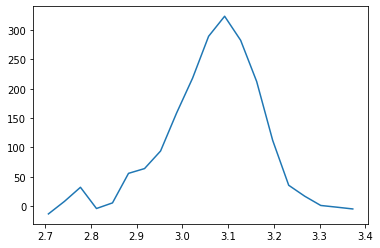

In [125]:
back_ground = double_exp(x_JP, a, b, t1, t2)
# plt.plot(x_JP, back_ground)
plt.plot(x_JP, y_JP-back_ground)

In [118]:
# x_cr = (x - x[y.argmax()]) / x.std()

x_cr = (x_JP - x_JP[y_JP.argmax()]) / x_JP.std()
y_no_noise = y_JP - back_ground

N = y.sum() * (x[-1] - x[0]) / len(x)
y_norm = y_no_noise / N

In [110]:
x_JP.std()

0.20181984540673895

In [111]:
(x_JP[0] - x_JP[1]) / -2

0.01749999999999985

In [121]:
curve_fit(crystalball.pdf, 2 * x_cr, y_norm, p0=(1, 1.1))

C:\Users\matte\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


(array([7.75352689, 1.61522571]),
 array([[inf, inf],
        [inf, inf]]))

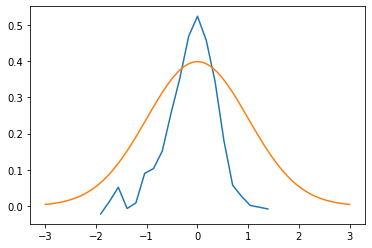

In [130]:
plt.plot(x_cr, y_norm)
plt.plot(np.linspace(-3,3,100), crystalball.pdf(np.linspace(-3,3,100), 7.75, 1.6))

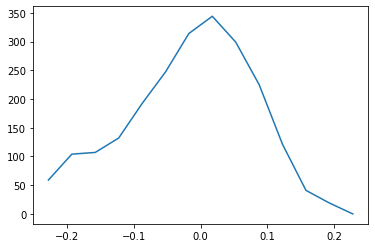

In [32]:
plt.plot(x - x.mean(), y - y.min())

In [ ]:
# crystalball.fit()

In [122]:
# curve_fit(crystalball.pdf, x_centered / x_centered.std(), y_no_noise/N, p0=(1, 1.1))

c:\users\matte\appdata\local\programs\python\python37\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(array([2.17859878, 1.01795774]),
 array([[inf, inf],
        [inf, inf]]))

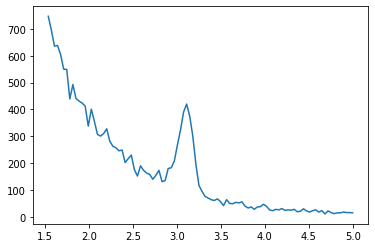

In [53]:
plt.plot(h[1][1:], h[0])

In [ ]:
plt.plot(crystalball.pdf(h[1]))